Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import plotly.express as px

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')
#movies_df.head()

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [3]:
# Code here
movies_df.drop(['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline'], axis=1)
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Remove any duplicate rows

In [4]:
# Code here
# Count Number of Duplicate Rows
num_duplicates = movies_df.duplicated().sum()
print("\nThere are {} duplicate rows.".format(num_duplicates))

# There are no duplicate rows to remove.


There are 0 duplicate rows.


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [5]:
# Code here
# Check for Missing Values
missing_values = movies_df.isnull().sum()
# print(missing_values)

# Drop Rows with Missing Data
movies_df_dropped = movies_df.dropna()
movies_df_dropped.head()
# missing_values_now = movies_df_dropped.isnull().sum()
# print(missing_values_now)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [6]:
# Change the release_date column to DateTime
# Check Column Data Types
# movies_df_dropped.dtypes

# Convert release_date column to datetime64 data type
movies_cleaned = movies_df_dropped.copy()
movies_cleaned['release_date'] = pd.to_datetime(movies_cleaned['release_date'], format='%Y-%m-%d')

# Extract the release year from every release date
# Add new column, release_year with release year
movies_cleaned['release_year'] = movies_cleaned['release_date'].dt.year
# movies_cleaned.head()
# movies_cleaned.dtypes

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [7]:
# Code here
movies_cleaned['budget'] = movies_cleaned['budget'].astype(np.int64)
movies_cleaned['revenue'] = movies_cleaned['revenue'].astype(np.int64)

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [8]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_cleaned.index, movies_cleaned[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_cleaned.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [9]:
# Inspect flattened data
movies_cleaned.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
554,72500000,['Comedy'],http://www.sonypictures.com/homevideo/talladeg...,9718,"[{""id"": 5922, ""name"": ""north carolina""}, {""id""...",en,Talladega Nights: The Ballad of Ricky Bobby,Lifelong friends and national idols Ricky Bobb...,12.599836,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2006-08-04,162966177,116.0,['English'],Released,The story of a man who could only count to #1,Talladega Nights: The Ballad of Ricky Bobby,6.2,491,2006


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [10]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_cleaned[movies_cleaned['genres'].apply(lambda x: 'Action' in x)]
action_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,['English'],Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [11]:
# Code here
# Most Expensive Movies
movies_cleaned.sort_values(by='budget', ascending=False).head()

# Least Expensive Movies
movies_cleaned.sort_values(by='budget', ascending=True).head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,2012-05-03,0,98.0,['English'],Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,2012
3880,0,"['Drama', 'Thriller', 'Crime']",http://www.mariallenaeresdegracia.com/index.html,436,"[{""id"": 30, ""name"": ""individual""}, {""id"": 242,...",es,"María, llena eres de gracia",A pregnant Colombian teenager becomes a drug m...,3.027892,"[{""name"": ""Fine Line Features"", ""id"": 8}, {""na...",...,2004-01-18,0,101.0,"['English', 'Español']",Released,"Based on 10,000 true stories.",Maria Full of Grace,6.9,101,2004
3879,0,"['Drama', 'Romance']",http://www.foxsearchlight.com/adam/,22051,"[{""id"": 170173, ""name"": ""children's book""}, {""...",en,Adam,"Adam, a lonely man with Asperger's Syndrome, d...",8.308442,"[{""name"": ""Vox3 Films"", ""id"": 3279}, {""name"": ...",...,2009-07-29,2277396,99.0,['English'],Released,A story about two strangers. One a little stra...,Adam,6.9,150,2009
2923,0,"['Comedy', 'Family', 'Science Fiction']",http://www.sttriniansmovie.co.uk/,10748,"[{""id"": 1577, ""name"": ""solidarity""}, {""id"": 15...",en,St. Trinian's,When their beloved school is threatened with c...,7.377587,"[{""name"": ""Ealing Studios"", ""id"": 2650}, {""nam...",...,2007-12-21,0,101.0,['English'],Released,Taking higher education to a new low.,St. Trinian's,5.6,142,2007
3807,0,['Horror'],http://www.thelovedonesmovie.com/,46420,"[{""id"": 627, ""name"": ""killing""}, {""id"": 6270, ...",en,The Loved Ones,"Lola Stone asked Brent Mitchell to the prom, b...",4.989985,"[{""name"": ""Omnilab Media"", ""id"": 2729}, {""name...",...,2009-09-13,0,84.0,['English'],Released,Don't break her heart,The Loved Ones,6.6,207,2009


The top 3 most expensive movies in terms of budgets all have popularity scores in excess of 134 and include two Pirates of the Caribbean titles (Stanger Tides and At World's End) and Avengers: Age of Ultron. Interestingly enough, the last two titles have much lower popularity scores less than 50 and include John Carter and Tangled.

The 5 cheapest movies in terms of budgets, all have popularity ratings less than 10.

It can thus be concluded that budgets do have a strong influence on movie popularity, not necessarily to provide the best story but most likely due to quality of effects like CGI and to acquire the most influential and talented actors/actresses. 

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [12]:
# Code here
# Check budget and revenue columns are of integer type
movies_cleaned.dtypes

# Calculate generated profits
movies_cleaned['Profit'] = movies_cleaned['revenue'] - movies_cleaned['budget']
movies_cleaned.sort_values(by='Profit', ascending=False).head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,Profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,1513528810,124.0,['English'],Released,The park is open.,Jurassic World,6.5,8662,2015,1363528810
44,190000000,['Action'],http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1506249360,137.0,['English'],Released,Vengeance Hits Home,Furious 7,7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1519557910,143.0,['English'],Released,Some assembly required.,The Avengers,7.4,11776,2012,1299557910


The top 5 most profitable films have fairly large budgets and confirm the theory that large budgets do aid movie popularity.
This top 5 includes Avatar, Titanic, Jurassic Wolrd, Furious 7 and The Avengers.

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [13]:
# Code here
movies_cleaned.sort_values(by='popularity', ascending=False).head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,Profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1156730962,91.0,['English'],Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,675120017,169.0,['English'],Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,783112979,108.0,['English'],Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,773328629,121.0,['English'],Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,378858340,120.0,['English'],Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,2015,228858340


The five most popular movies are Minions, Interstellar, Deadpool, Gaurdians of the Galaxy and Mad Max: Fury Road in decending order. 

#### Find Movies which are rated above 7

In [14]:
# Code here
movies_cleaned[movies_cleaned.vote_average>7].head()



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,Profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,2550965087
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,834939099
6,260000000,"['Animation', 'Family']",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,591794936,100.0,['English'],Released,They're taking adventure to new lengths.,Tangled,7.4,3330,2010,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,1405403694,141.0,['English'],Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,2015,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']",http://harrypotter.warnerbros.com/harrypottera...,767,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",...,933959197,153.0,['English'],Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,2009,683959197


Five examples of movies with a rating greater than 7 include Avatar, The Dark Knight Rises, Tangled, Avengers: Age of Ultron and Harry Potter and the Half Blood Prince. 

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

Text(0.5, 1.0, 'Count of Movies on Basis of Genre')

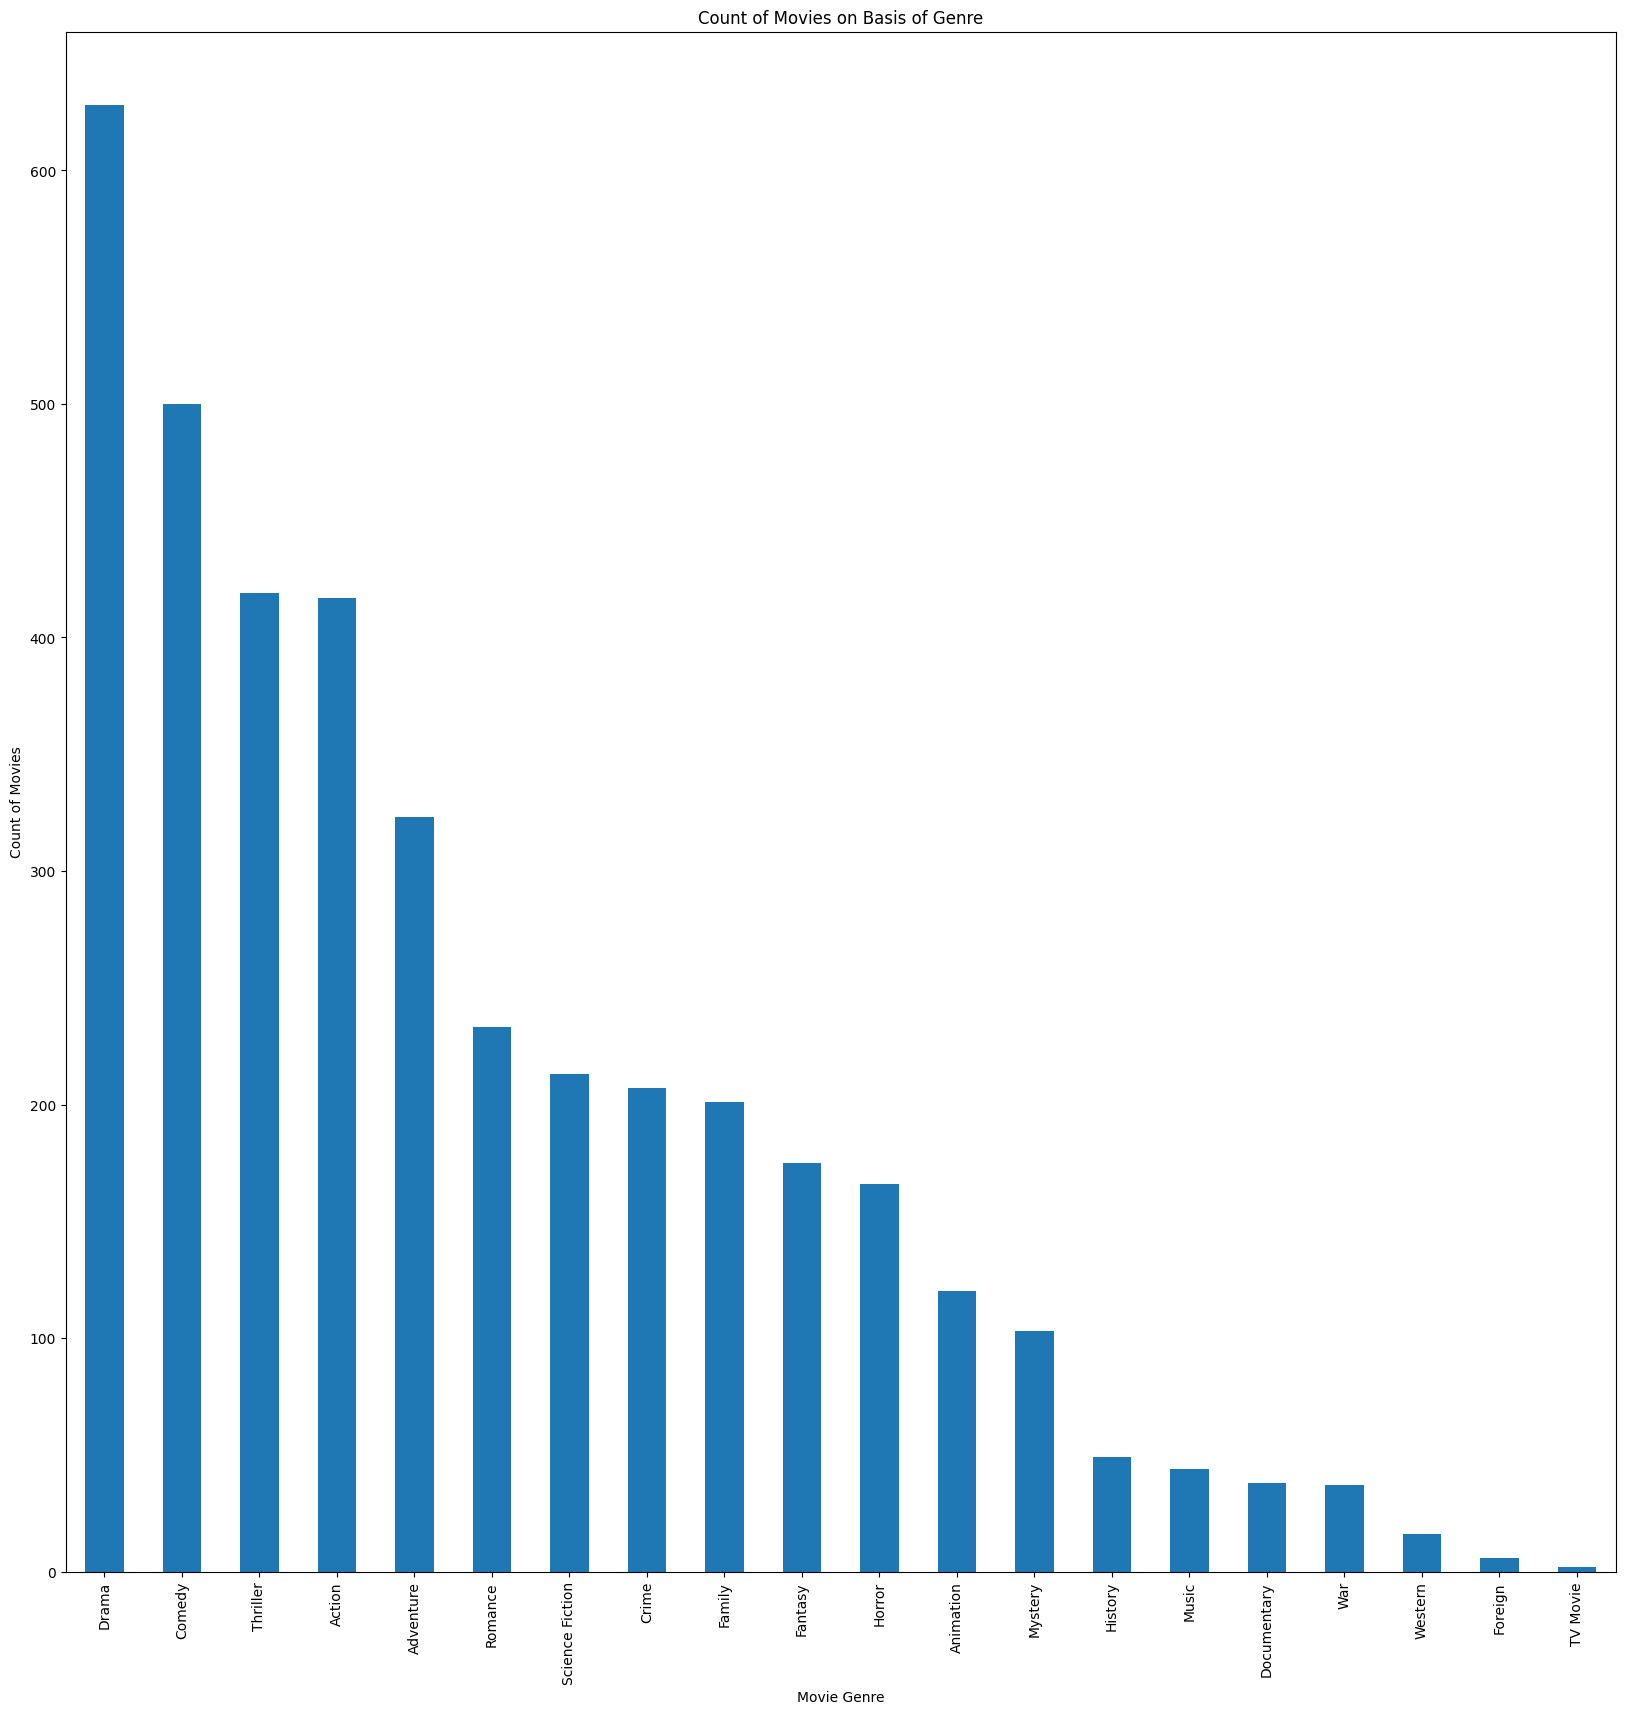

In [15]:
# Code here

# Need to convert string representation of list in genre column to actual list object
movies_cleaned['genres'] = movies_cleaned['genres'].apply(ast.literal_eval)

# Genre Dataframe creation
genre_dataframe = movies_cleaned.explode('genres')
genre_sums = genre_dataframe['genres'].value_counts()

# Bar Chart plot of Genre Counts
plt.figure(figsize=(20,20))
genre_sums.plot(kind='bar')
plt.xlabel('Movie Genre')
plt.ylabel('Count of Movies')
plt.title('Count of Movies on Basis of Genre')


The majority of films within this dataset fall into either the Drama, Comedy, Thriller, Action or Adventure sub-genres. 

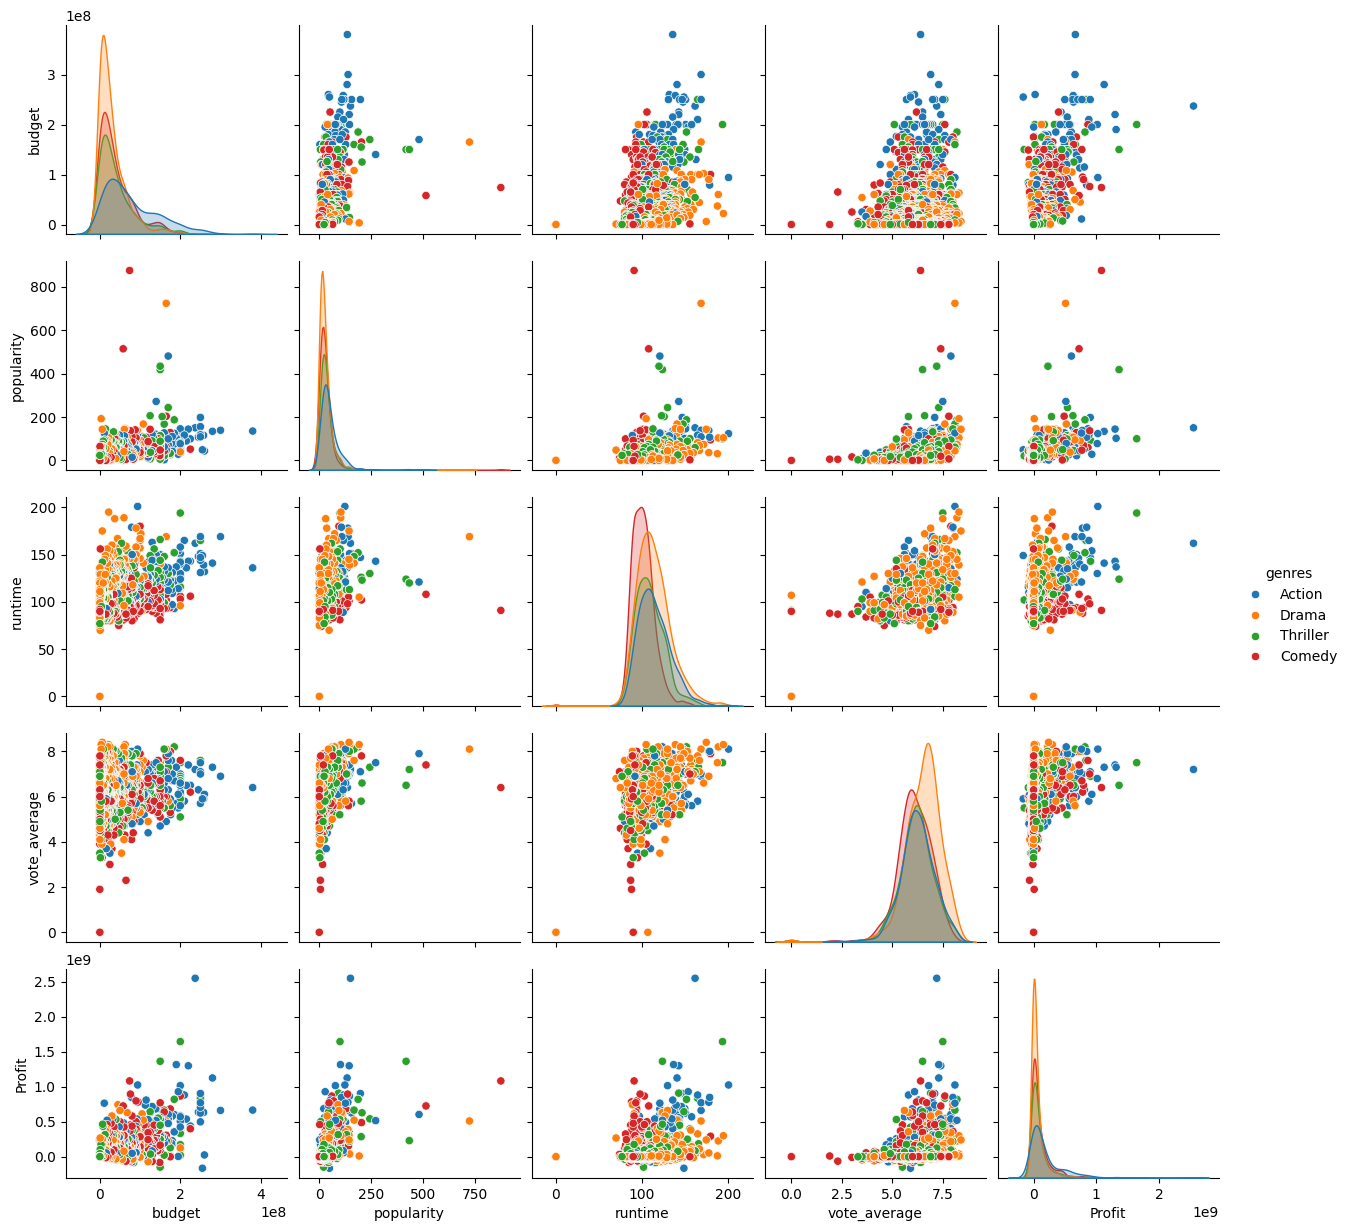

In [28]:
# Generate three different interesting visualisations with a data story.

# Pairplot for 4 Most Frequent Genres
films_genre_high_count = genre_dataframe[genre_dataframe['genres'].isin(['Drama', 'Comedy', 'Thriller', 'Action'])]
sns.pairplot(data=films_genre_high_count, x_vars=['budget', 'popularity', 'runtime', 'vote_average', 'Profit'], y_vars=['budget', 'popularity', 'runtime', 'vote_average', 'Profit'], hue='genres')


The above pair plot segregated by the most populous genres in this dataset, highlights numerous interesting points, which movie producers can leverage for upcoming titles in order to maximise return on investment. 
* There does exist a positive correlation between the profit and budget variables, as excluding some exceptions, profits do generally increase with increasing budget and hence other factors of consideration influence this relationship that need to be investigated. 
* Popularity has a positive correlation with both budgets and profits as expected as film makers would dedicate additional funds for sequels or movies in a storyline with sucessful predecessors. Popular films would bring in higher revenues, thus translating to higher profits with action movies tend to be the most popular and seemingly have the highest budgets in general as expected due to their stunts and CGI extensive nature.  
* Run time of the film does not seem to have any appreciable relationship with budget, popularity, profit or vote average.
* There is a slight positive correlation between profit and average vote and hence this variable alone does not lead to estimated higher profits.

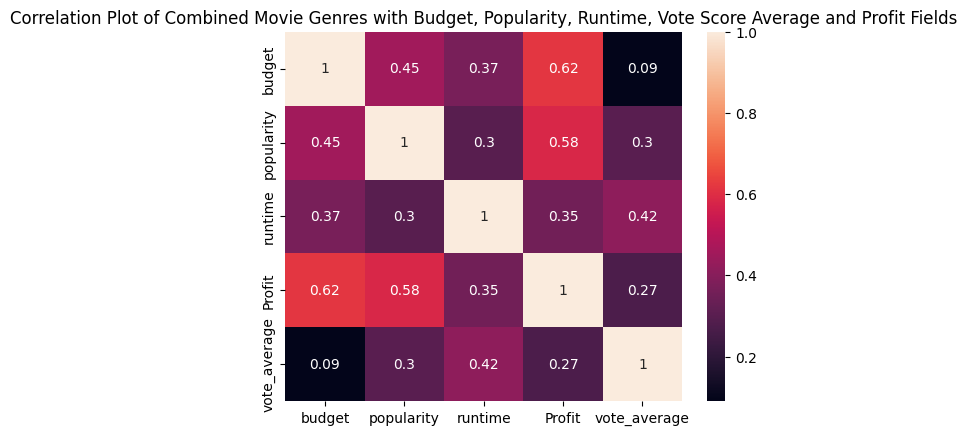

In [22]:
# Correlation Heatmaps
# Selection of columns of interest
movie_numerics = movies_cleaned[['budget', 'popularity', 'runtime', 'Profit', 'vote_average']]

# Plot Correlation Matrix - Combined Sexes
plt.figure()
corr_mat_mov = movie_numerics.corr()
sns.heatmap(corr_mat_mov, annot=True)
plt.title('Correlation Plot of Combined Movie Genres with Budget, Popularity, Runtime, Vote Score Average and Profit Fields')
plt.show()
plt.close()

From the above correlation plot, there are a number of interesting deductions that can be made.
* There is no appreciable correlation (0.09) between the average vote score and the film's budget. 
* There is a positive correlation between the popularity of the film and the film's budget (0.45) and as expected, an equally strong positive correlation between the film's profit and budget (0.62). This is perhaps due to acquiring better assets in the form of an experienced director, crew, tech resources for CGI scenes and also experienced and popular actors gaining popularity for the film with numerous purchases of tickets or streaming content and subsequently higher profits after the budget has been subtracted from the film's revenue. This is again noted by the positive correlation between popularity and profit (0.58).
* Run time and vote average are positively correlated (0.42), perhaps because of detailing the story further, providing backstories on characters for viewings to appreciate, understand and confide in and hence enhancing their viewing pleasure. Voter average and popularity are positively correlated (0.3) but interesting not as high as expected, with voter taste not aligning to the mass public who have watched the film. 

In [ ]:
# Combined Histplots

(0.0, 278371766.5013932)

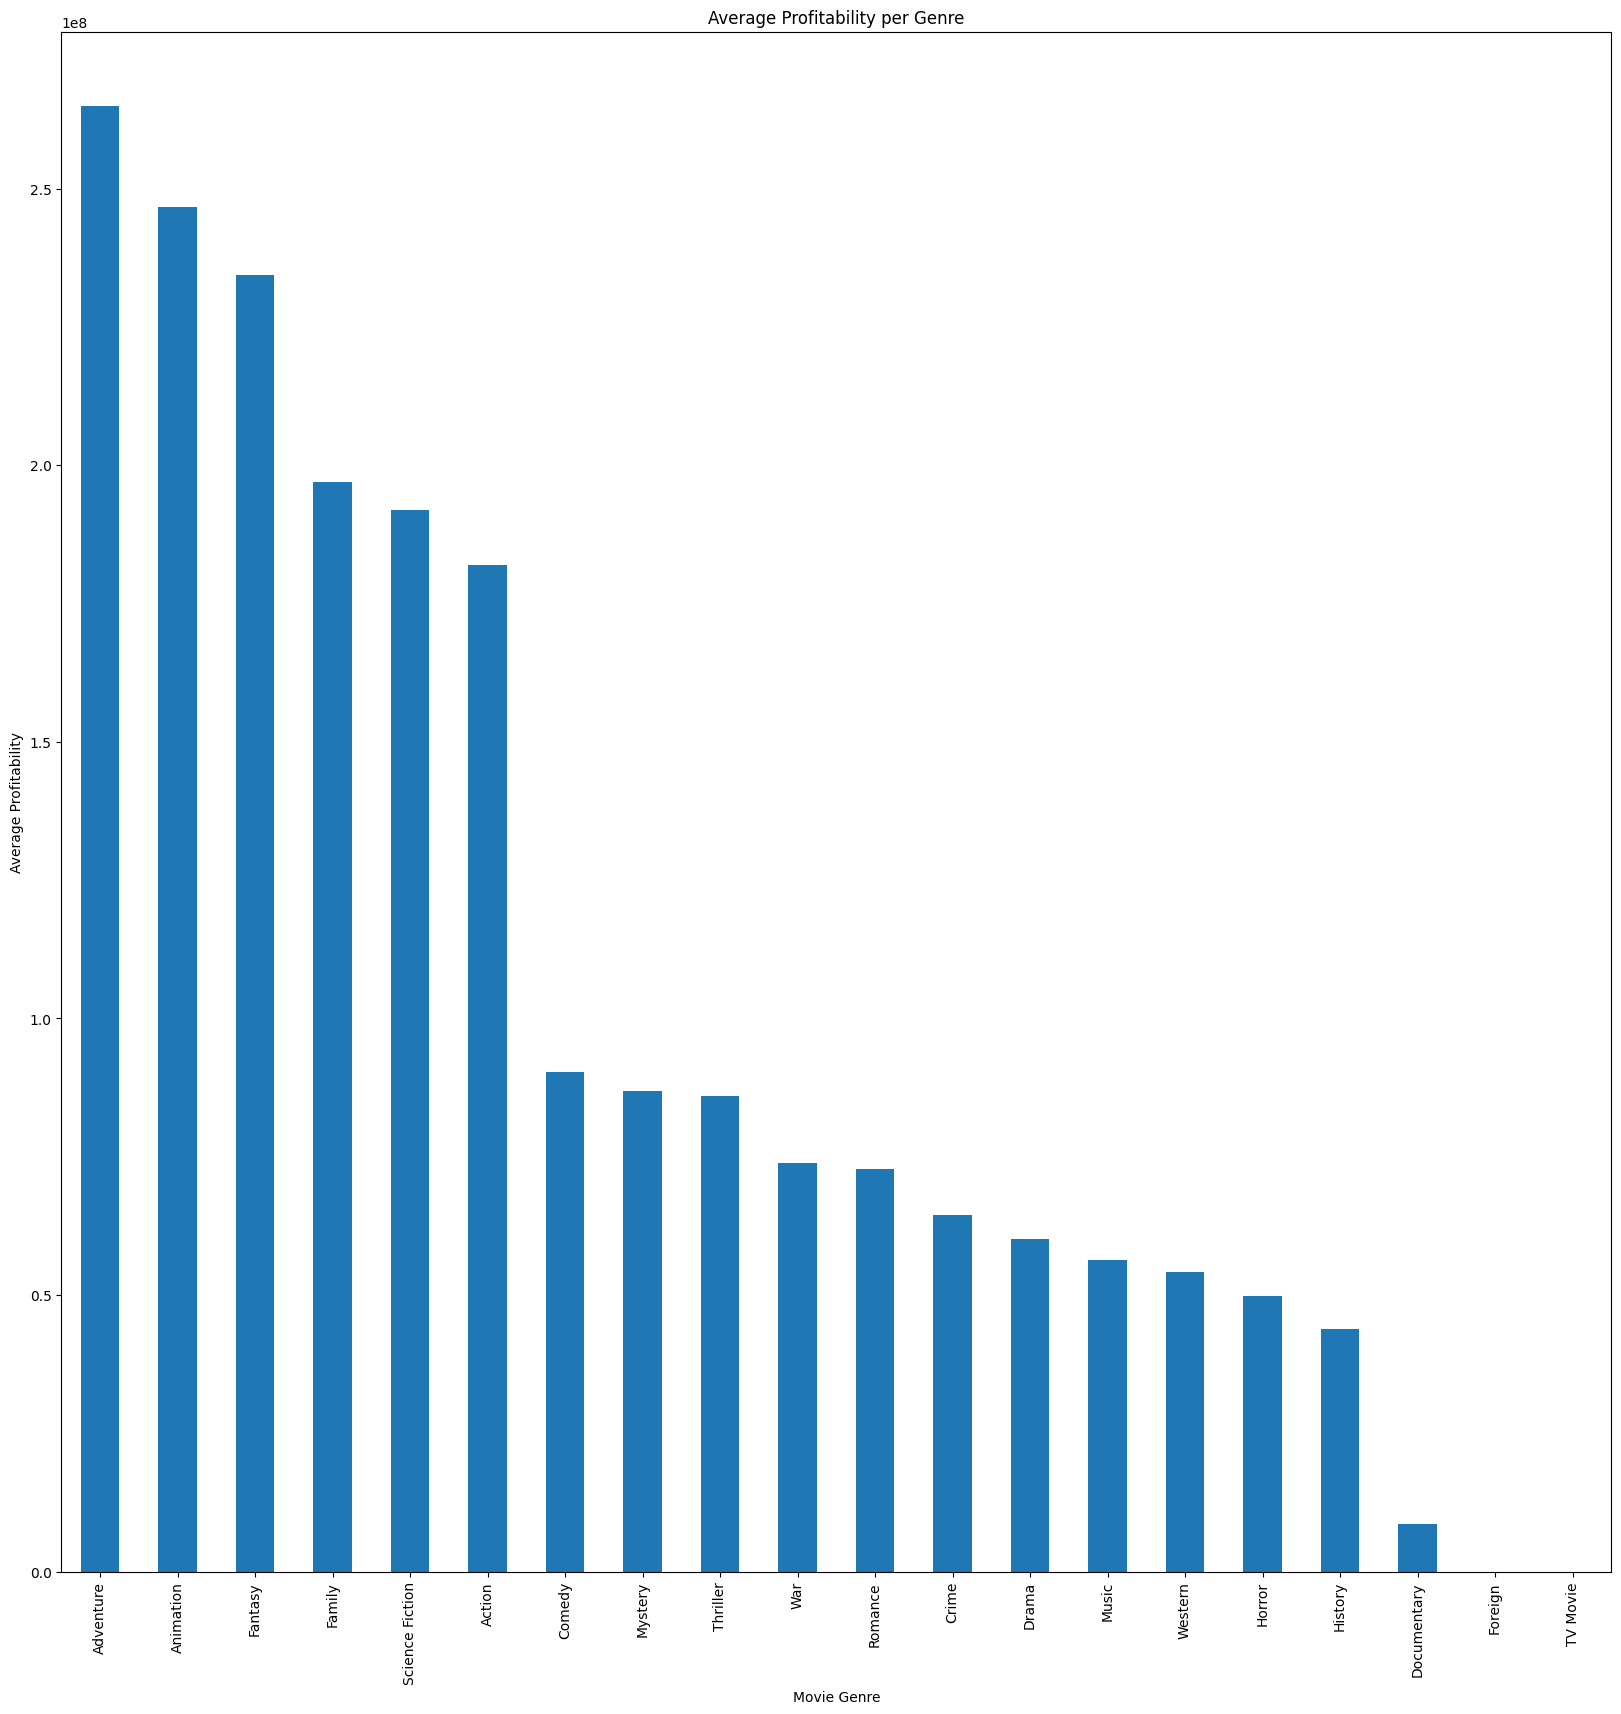

In [30]:
# Average profitability by movie genre
genre_profitability = genre_dataframe.groupby('genres')['Profit'].mean().sort_values(ascending=False)

# Plot Figure
plt.figure(figsize=(20,20))
genre_profitability.plot(kind='bar')
plt.title('Average Profitability per Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Average Profitability')
plt.ylim(bottom=0)


Based on the above bar chart, the most profitable movie genres on average are adventure, animation, fantasy, family and science fiction genres. 

(0.0, 67.34075801981423)

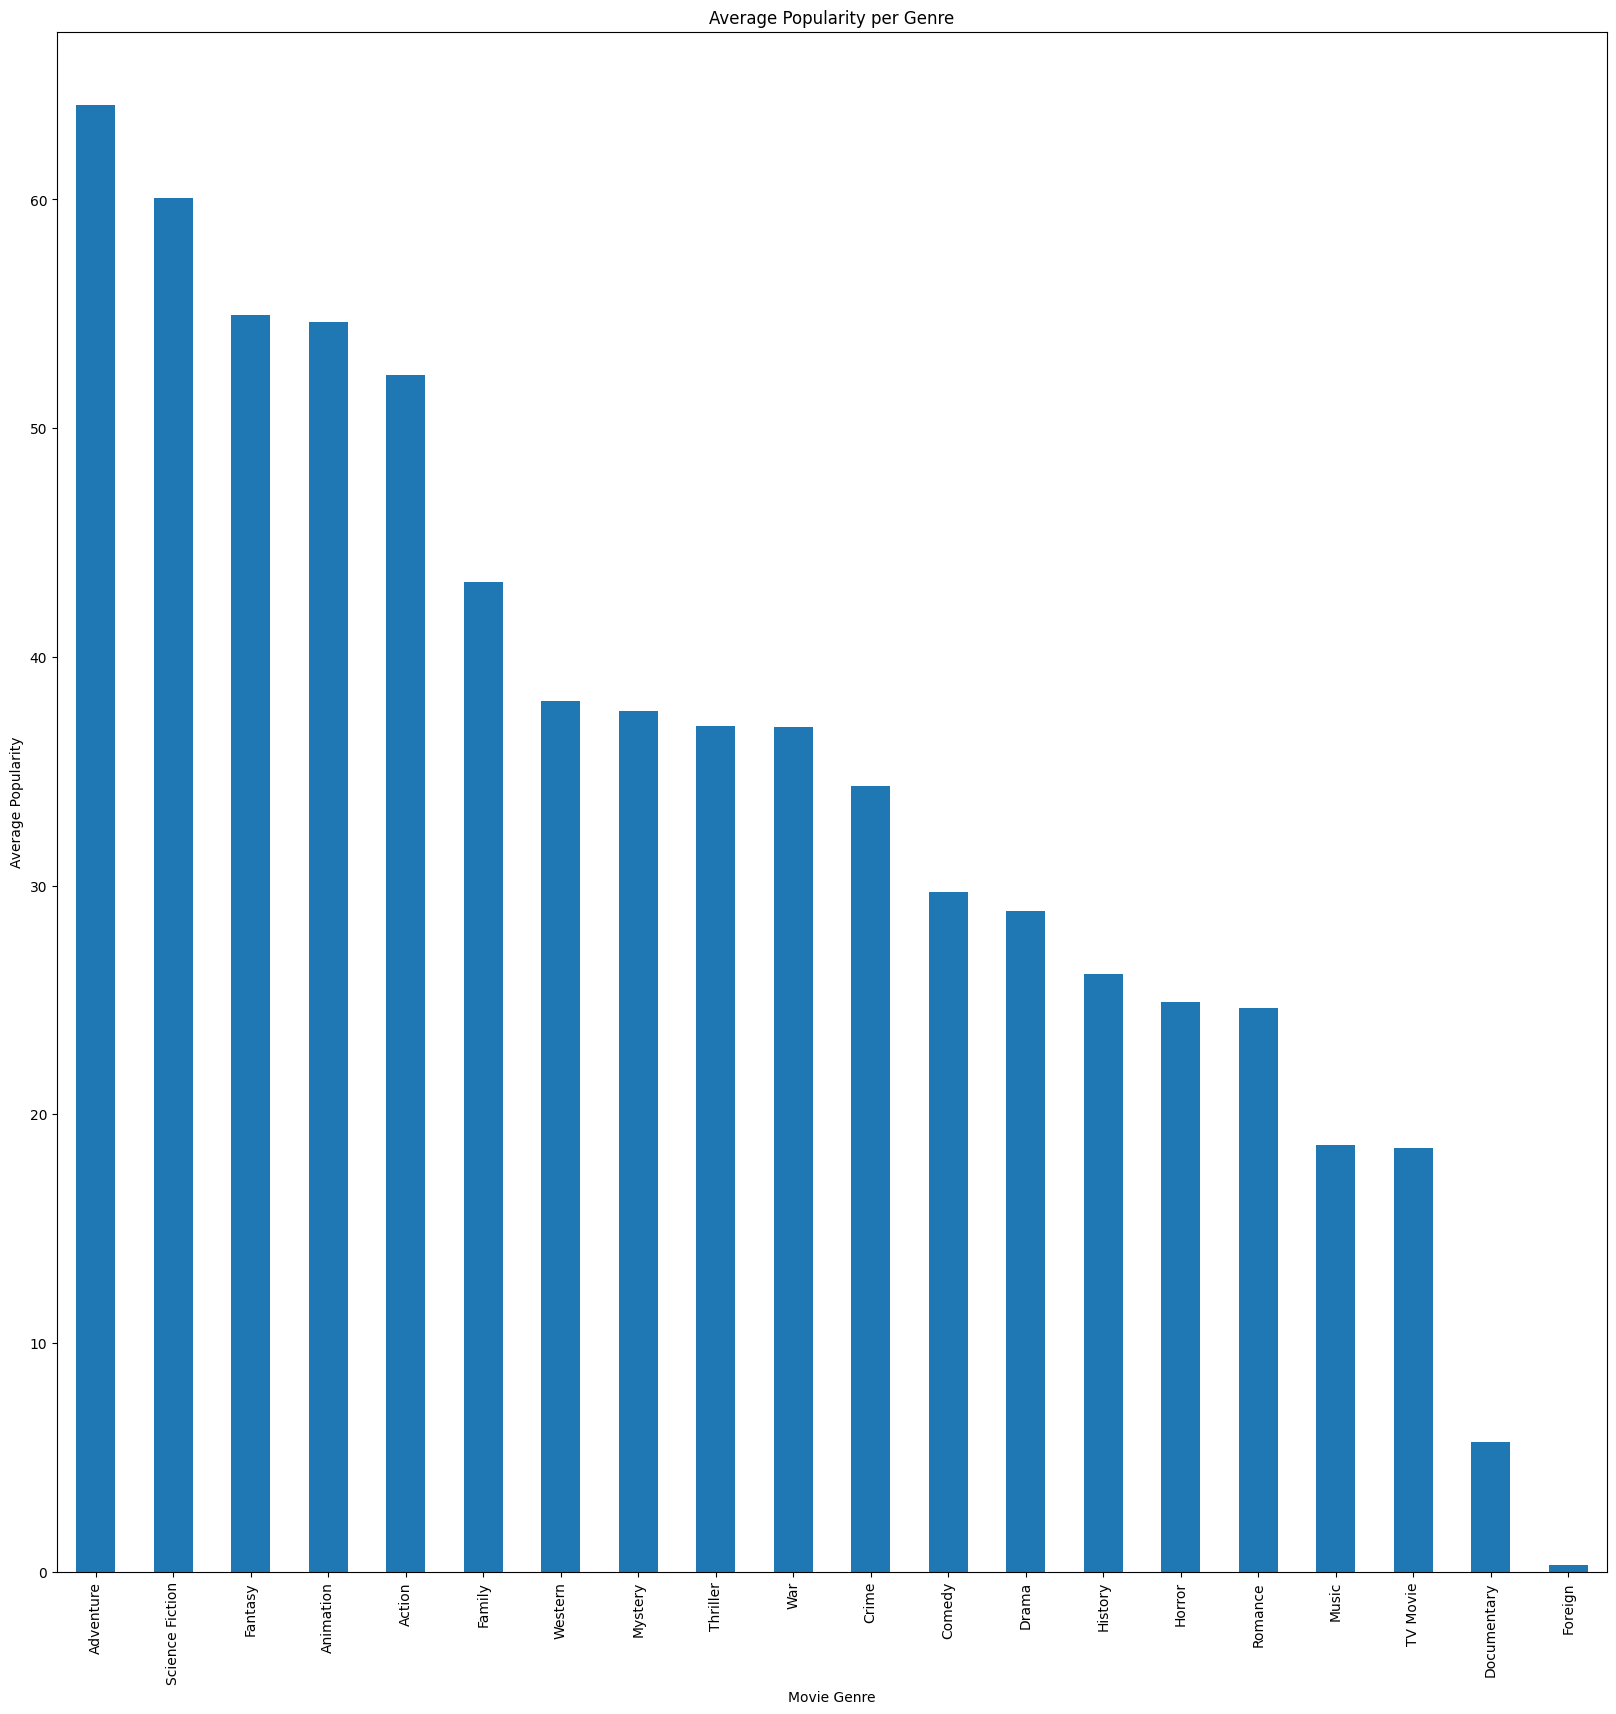

In [31]:
# Average Runtime by Popularity
genre_popularity = genre_dataframe.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Plot Figure
plt.figure(figsize=(20,20))
genre_popularity.plot(kind='bar')
plt.title('Average Popularity per Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Average Popularity')
plt.ylim(bottom=0)


Based on the above bar chart, the most popular movie genres on average are adventure, science fiction, fantasy, animation and action films.

In [36]:
# Combined Box Plots - Budgets for Top 4 Most Frequent Genres
fig = px.box(films_genre_high_count, x='genres', y='budget', color='genres', points='all')
fig.show()


The above box plot in line with the same four selected genres as used in the pair plot above, are now plotted with respect to their budgets of which a few interesting points can be noted.
* The action genre has the highest range of budgets and with the highest median of 60M USD. This is expected, given the overall popularity of this genre and its subsequent link to profitability as well with these variables all positively correlated. The action genre interesting has the fewest outliers, compared to the other three genres. This suggests that these films are generally equally budgeted for due to their popularity and past historical data given their high success in the film industry.
* The other three genres have much smaller ranges, particularly between the 1st quartile and lower fence with numerous outlying points beyond the upper fence highlighting many films with unusually high budgets for their genre, perhaps at an attempt to increase popularity and hopefully drive higher profits.